## **Librerías**

In [6]:
from sklearn.datasets import load_breast_cancer

from sklearn.ensemble import RandomForestClassifier

In [14]:
from yellowbrick.features import PCA
from yellowbrick.model_selection import ValidationCurve, LearningCurve

## **Data**

In [3]:
df = load_breast_cancer()

In [4]:
classes = df.target_names

X = df.data
y = df.target

## **Visualizaciones**

### **PCA**

PCA (Análisis de Componentes Principales) es una técnica de reducción de dimensionalidad que transforma un conjunto de variables posiblemente correlacionadas en un nuevo conjunto de variables llamadas componentes principales, que son no correlacionadas entre sí. Cada componente principal captura la mayor cantidad posible de variación de los datos originales, permitiendo simplificar el dataset manteniendo la mayor parte de su información importante. Se usa mucho para visualizar datos complejos, acelerar modelos de machine learning o eliminar ruido.

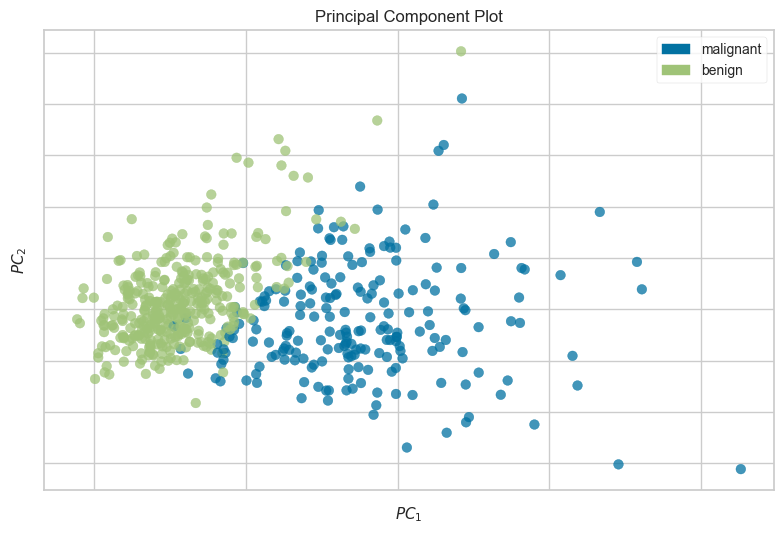

<Axes: title={'center': 'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$'>

In [5]:
visualizer = PCA(
    scale = True,
    projection = 2,
    classes = classes
)

visualizer.fit_transform(X, y)
visualizer.show()

### **Curva de Validación**

Una curva de validación muestra cómo cambia el desempeño de un modelo de machine learning cuando se modifica un hiperparámetro específico, como la profundidad de un árbol o la regularización de un modelo. Generalmente se grafican tanto el score de entrenamiento como el de validación a medida que se ajusta ese hiperparámetro, permitiendo identificar si el modelo está subajustado, sobreajustado o en el punto óptimo de complejidad para generalizar bien a datos nuevos.

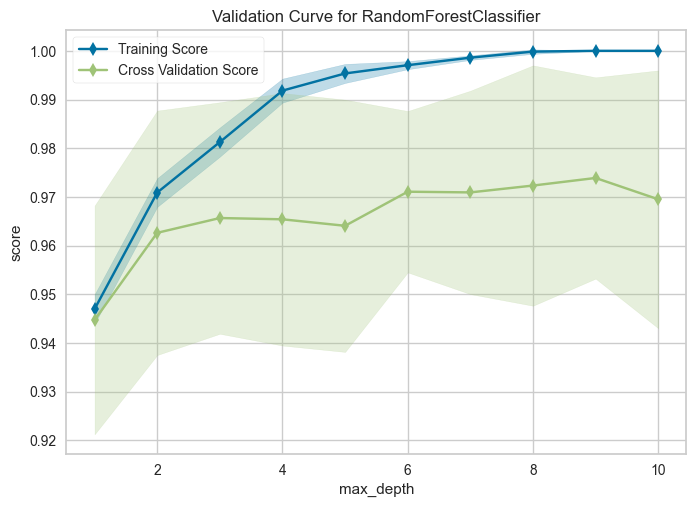

<Axes: title={'center': 'Validation Curve for RandomForestClassifier'}, xlabel='max_depth', ylabel='score'>

In [13]:
visualizer = ValidationCurve(
    RandomForestClassifier(),
    param_name='max_depth',
    param_range=range(1, 11),
    cv=10,
    scoring='f1'
)

visualizer.fit(X, y)
visualizer.show()

### **Curva de Aprendizaje**

Una curva de aprendizaje muestra cómo cambia el desempeño de un modelo de machine learning a medida que aumenta la cantidad de datos de entrenamiento. En el gráfico, se comparan los resultados del modelo sobre los datos de entrenamiento y sobre datos de validación. Analizar la forma de la curva ayuda a entender si el modelo está sufriendo de sobreajuste, subajuste o si está generalizando bien, y también a identificar si podría beneficiarse de tener más datos o de ajustar su complejidad.

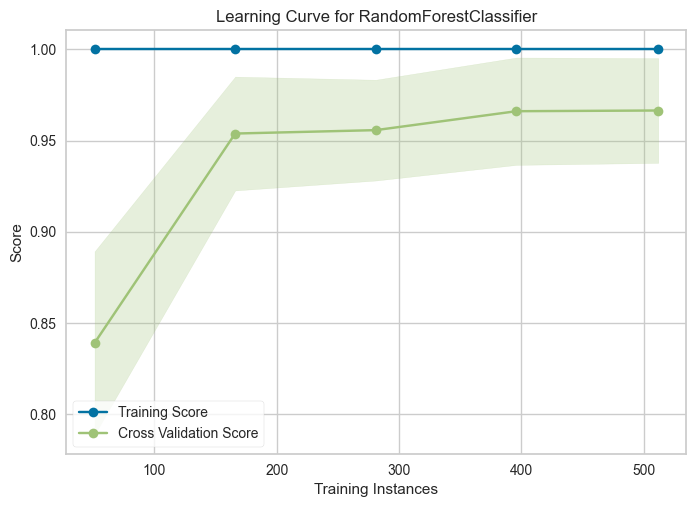

<Axes: title={'center': 'Learning Curve for RandomForestClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [15]:
visualizer = LearningCurve(
    RandomForestClassifier(),
    n_jobs=1,
    cv=10,
    scoring='f1'
)

visualizer.fit(X, y)
visualizer.show()